In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [2]:
from google.colab import drive
drive.mount('/content/drive/')
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pcos_modified.csv")

Mounted at /content/drive/


In [3]:
df

,Patient File No.,Follicle No. (L),Follicle No. (R),Skin darkening (Y/N),Weight gain(Y/N),hair growth(Y/N),Weight (Kg),Cycle(R/I),Pimples(Y/N),Fast food (Y/N),Age (yrs),BMI,Marraige Status (Yrs),PCOS (Y/N)
0,1,3,3,0,0,0,44.6,2,0,1,28,19.3,7.0,0
1,2,3,5,0,0,0,65.0,2,0,0,36,24.9,11.0,0
2,3,13,15,0,0,0,68.8,2,1,1,33,25.3,10.0,1
3,4,2,2,0,0,0,65.0,2,0,0,37,29.7,4.0,0
4,5,3,4,0,0,0,52.0,2,0,0,25,20.1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,1,0,0,0,0,50.0,2,0,0,35,18.5,8.0,0
537,538,9,7,0,1,0,63.2,2,0,0,30,25.3,4.0,0
538,539,1,0,0,0,0,54.0,2,0,0,36,23.4,8.0,0
539,540,7,6,0,0,0,50.0,4,1,0,27,22.2,2.0,0


In [4]:

# Remove the 'Patient File No.' column (ID) and 'PCOS (Y/N)' column (class)
df = df.drop(columns=['Patient File No.', 'Follicle No. (L)', 'Follicle No. (R)'])

# Fill missing values with the mean of each column
df = df.fillna(df.mean())

# Split the data into features (X) and target (y)
X = df.drop(columns=['PCOS (Y/N)'])
y = df['PCOS (Y/N)']
y


0      0
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: PCOS (Y/N), Length: 541, dtype: int64

In [5]:
X

,Skin darkening (Y/N),Weight gain(Y/N),hair growth(Y/N),Weight (Kg),Cycle(R/I),Pimples(Y/N),Fast food (Y/N),Age (yrs),BMI,Marraige Status (Yrs)
0,0,0,0,44.6,2,0,1,28,19.3,7.0
1,0,0,0,65.0,2,0,0,36,24.9,11.0
2,0,0,0,68.8,2,1,1,33,25.3,10.0
3,0,0,0,65.0,2,0,0,37,29.7,4.0
4,0,0,0,52.0,2,0,0,25,20.1,1.0
...,...,...,...,...,...,...,...,...,...,...
536,0,0,0,50.0,2,0,0,35,18.5,8.0
537,0,1,0,63.2,2,0,0,30,25.3,4.0
538,0,0,0,54.0,2,0,0,36,23.4,8.0
539,0,0,0,50.0,4,1,0,27,22.2,2.0


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the input data to 3D for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [7]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/10
14/14 [==============================] - 3s 43ms/step - loss: 0.6834 - accuracy: 0.5671 - val_loss: 0.6503 - val_accuracy: 0.7706
Epoch 2/10
14/14 [==============================] - 0s 5ms/step - loss: 0.6347 - accuracy: 0.7801 - val_loss: 0.6017 - val_accuracy: 0.8165
Epoch 3/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5925 - accuracy: 0.8032 - val_loss: 0.5589 - val_accuracy: 0.8532
Epoch 4/10
14/14 [==============================] - 0s 7ms/step - loss: 0.5565 - accuracy: 0.8148 - val_loss: 0.5192 - val_accuracy: 0.8349
Epoch 5/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5218 - accuracy: 0.8194 - val_loss: 0.4852 - val_accuracy: 0.8532
Epoch 6/10
14/14 [==============================] - 0s 6ms/step - loss: 0.4934 - accuracy: 0.8194 - val_loss: 0.4526 - val_accuracy: 0.8624
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 0.4679 - accuracy: 0.8241 - val_loss: 0.4278 - val_accuracy: 0.8532
Epoch 8/10
14/14 [=

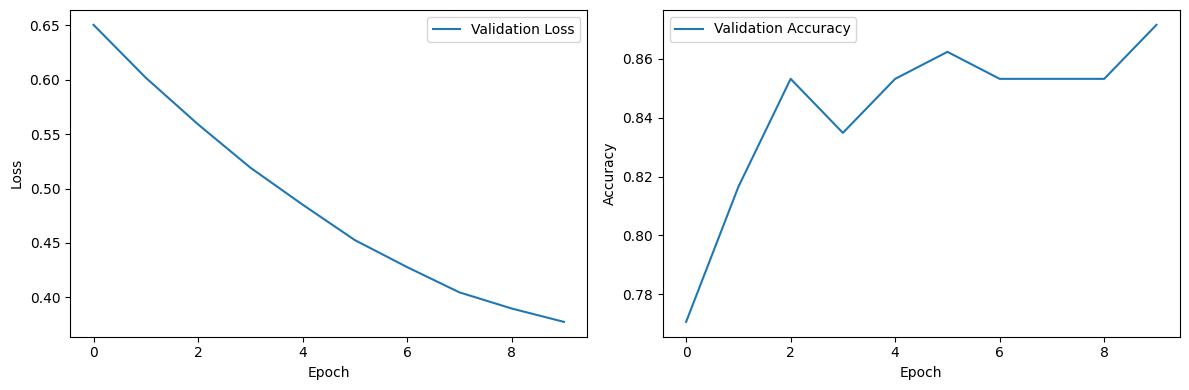

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Calculate F1 score, precision, and recall
f1 = f1_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)

print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

4/4 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        77
           1       0.78      0.78      0.78        32

    accuracy                           0.87       109
   macro avg       0.85      0.85      0.85       109
weighted avg       0.87      0.87      0.87       109

F1 Score: 0.7812
Precision: 0.7812
Recall: 0.7812


In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

4/4 [==============================] - 0s 3ms/step - loss: 0.3776 - accuracy: 0.8716
Test loss: 0.3776
Test accuracy: 0.8716
